In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

plt.style.use('fast')

In [113]:
data = pd.read_csv("full_day_data.csv" )
print(data)

           time    co2   tvoc   pm2.5   pm10   temp   hum
0      18:03:09      0      1       3      3     20    41
1      18:03:14  10000      1       3      3     20    41
2      18:03:19  10000      1       3      3     20    40
3      18:03:23   2022      1       4      4     20    39
4      18:03:28   1367      1       5      5     20    39
...         ...    ...    ...     ...    ...    ...   ...
17987  16:39:02   1057      1     172    199     18    36
17988  16:39:07   1055      1     209    236     18    35
17989  16:39:12   1056      1     191    213     18    35
17990  16:39:16   1054      1     153    168     18    34
17991  16:39:21   1046      1     144    155     18    34

[17992 rows x 7 columns]


In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'presentation',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [103]:
column_header = list(data.columns)
#co2 = data.loc[:, 'tvoc']
time = data.loc[:, column_header[0]]
co2 = data.loc[:, column_header[1]]
tvoc = data.loc[:, column_header[2]]
pm25 = data.loc[:, column_header[3]]
pm10 = data.loc[:, column_header[4]]
temp = data.loc[:, column_header[5]]
hum = data.loc[:, column_header[5]]

In [114]:
#smoothing function choose window length
window_len =10
new_data_len = math.ceil(len(data)/window_len, )
new_data = np.zeros((new_data_len, 6))
new_time = []
for i in range(new_data_len-1):
    for j in range(window_len):
        new_data[i, :] += list(data.iloc[i*window_len+j, 1:])
    new_time.append(data.iloc[i*window_len, 0])
new_data = new_data/window_len

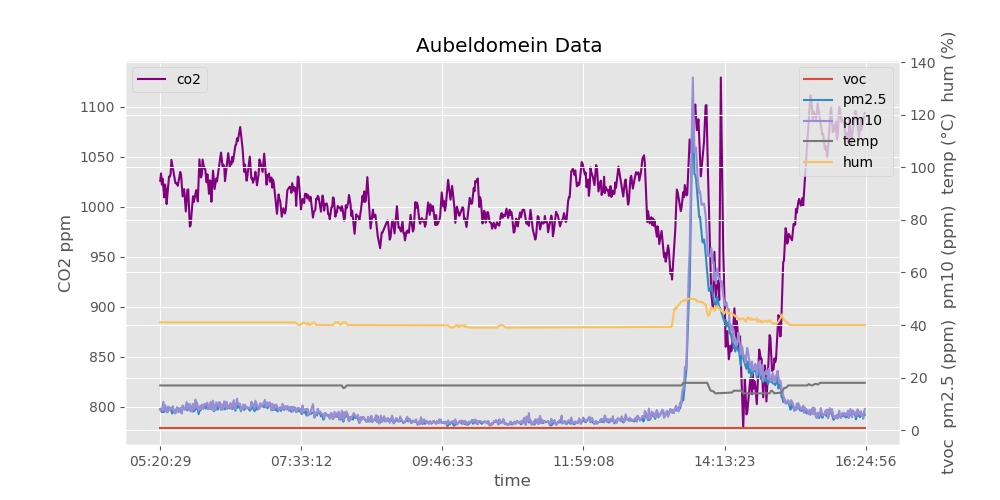

In [115]:
%matplotlib widget
plt.style.use('ggplot')
range_left = 0.5
range_right = 0.99

fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(10)


ax1 = ax.twinx()
ax.plot(new_data[round(range_left*new_data_len):round(range_right*new_data_len), 0], label = 'co2' , color='purple')
ax1.plot(new_data[round(range_left*new_data_len):round(range_right*new_data_len), 1],label = 'voc')
ax1.plot(new_data[round(range_left*new_data_len):round(range_right*new_data_len), 2], label = 'pm2.5')
ax1.plot(new_data[round(range_left*new_data_len):round(range_right*new_data_len), 3],  label = 'pm10')
ax1.plot(new_data[round(range_left*new_data_len):round(range_right*new_data_len), 4], label = 'temp' )
ax1.plot(new_data[round(range_left*new_data_len):round(range_right*new_data_len), 5],  label = 'hum')

ax.set_title("Aubeldomein Data ")
ax.set_xlabel('time')
ax.set_ylabel('CO2 ppm')
ax1.set_ylabel("tvoc  pm2.5 (ppm)  pm10 (ppm)  temp (°C)  hum (%)")


spacing = (range_right-range_left)
tick, labs = plt.xticks()
tick_len = new_data_len*spacing
new_ticks = [0, 0.2*tick_len, 0.4*tick_len, 0.6*tick_len, 0.8*tick_len, tick_len]
new_labels = [new_time[round(range_left*new_data_len)],new_time[round((range_left + spacing/5)*new_data_len )], new_time[round((range_left + 2*spacing/5)*new_data_len)], new_time[round((range_left + 3*spacing/5)*new_data_len)], new_time[round((range_left + 4*spacing/5)*new_data_len)],new_time[round(range_right*new_data_len-2 )]]
plt.xticks(ticks=new_ticks, labels=new_labels)
ax.legend(loc="upper left")
ax1.legend(loc="upper right")

#plt.annotate('left apartment',xy = (45,85), xytext= (60, 120), arrowprops=dict(facecolor='black', shrink=0.05)  )

#plt.annotate('back home',xy = (390,77), xytext= (300, 120), arrowprops=dict(facecolor='black', shrink=0.05)  )


#plt.savefig('full_day_data_plot_light.png')





In [35]:

time_len = len(new_time)
print(time_len, new_data_len)
l = [0. ,200,   400., 600,  800., 1000]
print(l)


899 900
[0.0, 200, 400.0, 600, 800.0, 1000]


In [171]:
a = new_time[round(0*new_data_len)]
type(a)

str